In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline
sns.set(color_code = True)

UsageError: Line magic function `%matplotlib.inline` not found.


## 1. Load data csv

In [2]:
df = pd.read_csv("data_car.csv")
# menampilkan 5 row pertama
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2. Menampilkan isi dari 5 row terakhir


In [3]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3. Mengecek tipe data dari setiap kolom


In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Drop kolom tidak relevan


In [5]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5. Menamai ulang kolom


In [6]:
df = df.rename(columns={"Engine HP" : "HP", "Engine Cylinders" : "Cylinders", "Transmission Type" : "Transmission", "Driven_Wheels" : "Drive Mode", "highway MPG" :"MPG-H", "city mpg" : "MPG-C", "MSRP" : "Price"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          11914 non-null  object 
 1   Model         11914 non-null  object 
 2   Year          11914 non-null  int64  
 3   HP            11845 non-null  float64
 4   Cylinders     11884 non-null  float64
 5   Transmission  11914 non-null  object 
 6   Drive Mode    11914 non-null  object 
 7   MPG-H         11914 non-null  int64  
 8   MPG-C         11914 non-null  int64  
 9   Price         11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


## 6. Drop kolom duplikat


In [7]:
df.shape

(11914, 10)

In [8]:
duplic= df[df.duplicated()]
print("baris yang duplikat berjumlah : ", duplic.shape)

baris yang duplikat berjumlah :  (989, 10)


In [9]:
# menghitung keseluruhan data yang dimiliki
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [10]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [11]:
# menghitung total data setelah duplicate value di remove
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

## 7. Drop data null / missing value

In [12]:
# mengecek nilai kosong
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


*/ cara mengisi data kosong disebut imputasi

In [13]:
# drop data kosong
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [14]:
# cek data setelah di drop
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## 8. Mengecek outlier

Outlier adalah data atau observasi yang jauh berbeda dari sebagian besar data dalam sebuah dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          10827 non-null  object 
 1   Model         10827 non-null  object 
 2   Year          10827 non-null  int64  
 3   HP            10827 non-null  float64
 4   Cylinders     10827 non-null  float64
 5   Transmission  10827 non-null  object 
 6   Drive Mode    10827 non-null  object 
 7   MPG-H         10827 non-null  int64  
 8   MPG-C         10827 non-null  int64  
 9   Price         10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


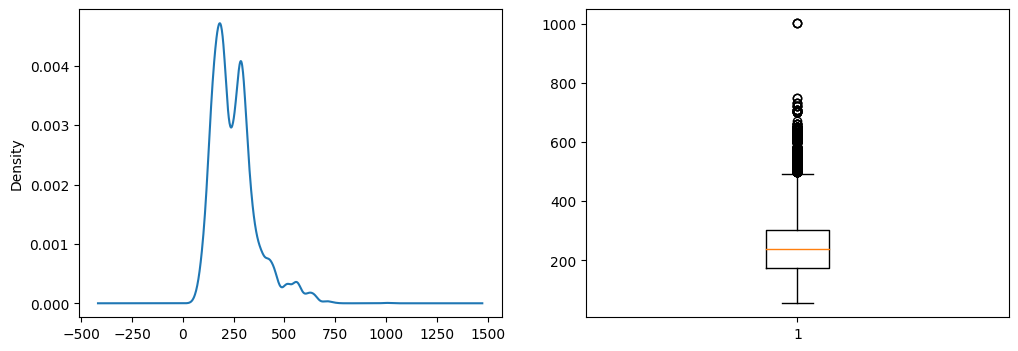

In [16]:
outl = plt.figure(figsize=(12,4))
outl.add_subplot(1,2,1)
df['HP'].plot(kind='kde')
outl.add_subplot(1,2,2)
plt.boxplot(df['HP'])
plt.show()

<AxesSubplot: xlabel='Price'>

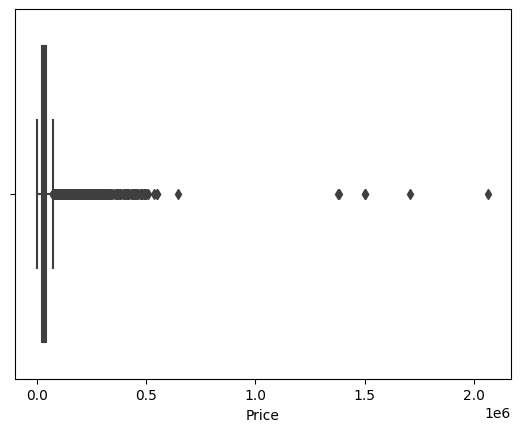

In [17]:
sns.boxplot(x=df['Price'])

<AxesSubplot: xlabel='HP'>

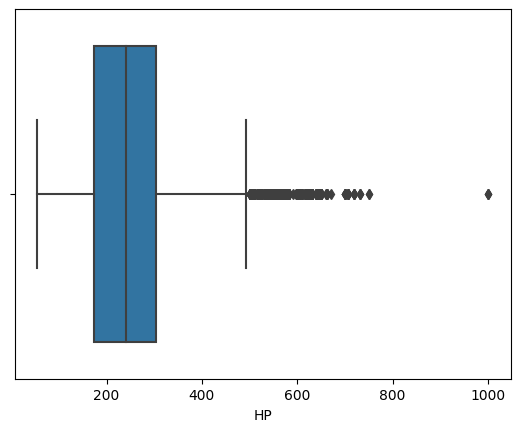

In [18]:
sns.boxplot(x=df['HP'])

<AxesSubplot: xlabel='Cylinders'>

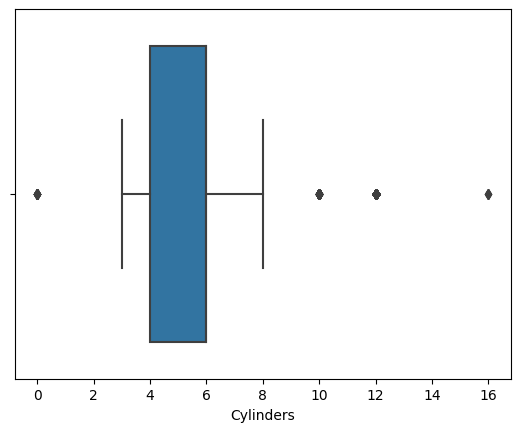

In [19]:
sns.boxplot(x=df['Cylinders'])

## Merubah nilai outlier
- Normalisasi data adalah proses transformasi data agar memiliki skala yang seragam atau mendekati distribusi normal. Tujuannya adalah untuk memastikan bahwa setiap fitur atau variabel memiliki bobot yang sama pada saat dilakukan analisis atau pemodelan. Normalisasi juga dapat membantu memperbaiki masalah seperti bias yang disebabkan oleh perbedaan skala atau unit pengukuran antar variabel. Ada beberapa teknik normalisasi data yang dapat digunakan, termasuk Min-Max Scaling, Z-Score Scaling, dan Robust Scaling.

- Diskritisasi data adalah proses mengubah variabel numerik yang kontinu menjadi variabel diskrit. Hal ini dapat dilakukan dengan mengelompokkan nilai-nilai variabel ke dalam beberapa kategori atau interval diskrit. Tujuannya adalah untuk mengurangi kompleksitas data dan memfasilitasi analisis. Contoh penerapan diskritisasi data adalah pada analisis data spasial, di mana kontinum data spasial seperti tingkat curah hujan dapat dikelompokkan ke dalam beberapa kategori seperti rendah, sedang, atau tinggi. Diskritisasi data juga dapat membantu mengurangi efek dari noise dan kesalahan pengukuran pada data. Namun, diskritisasi data dapat menyebabkan kehilangan informasi dan pengelompokan yang tidak tepat dapat menghasilkan analisis yang salah. Oleh karena itu, perlu dilakukan penilaian yang cermat sebelum melakukan diskritisasi data.

## 9. Visualisasi

- Count = count digunakan untuk menghitung jumlah kontainer dari data
  ([1,2,3] = 3)
- Sum   = sum digunakan untuk menghitung total isi dari suatu data
  ([1,2,3] = 6)

### Analysis Univariate

In [20]:
df.Price.describe()

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Price, dtype: float64

Histogram

Text(0.5, 0, 'Merk')

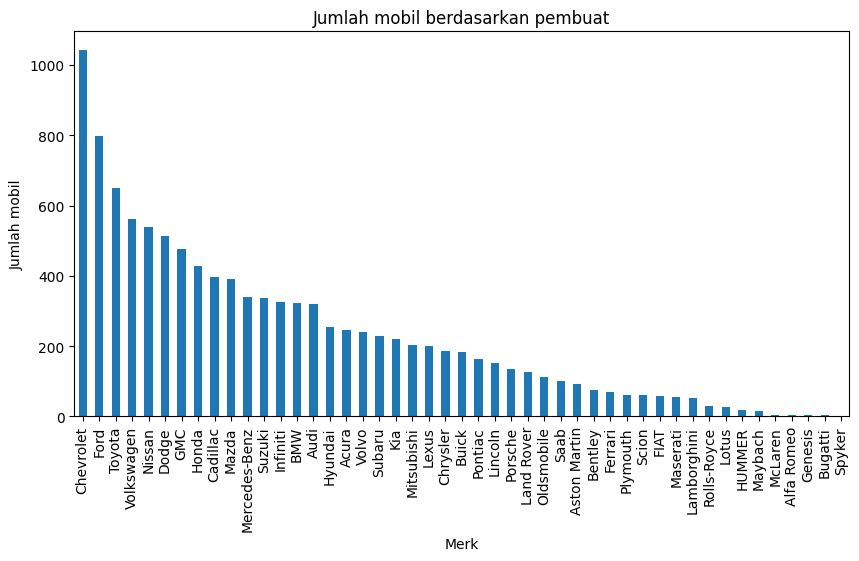

In [21]:
df.Make.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
# make = nama label
# value_counts = untuk menghitung jumlah total dari label
# nlargest = untuk mengatur jumlah fitur yang akan ditampilkan
# bar = untuk mengatur jenis data yang akan divisualisasikan
# figsize(figuresize) = untuk mengatur besar kanvas

plt.title("Jumlah mobil berdasarkan pembuat")
plt.ylabel('Jumlah mobil')
plt.xlabel('Merk')

Heat maps

/tmp/ipykernel_16384/3250134897.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


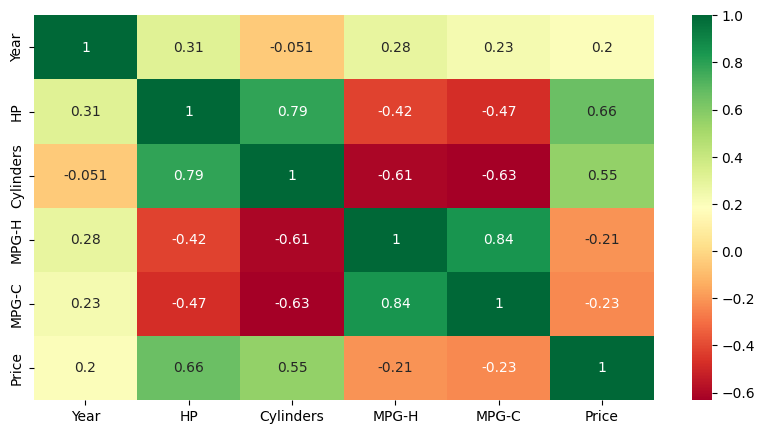

In [22]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="RdYlGn", annot=True)
c


### Korelasi
- Korelasi adalah istilah statistik yang menggambarkan hubungan atau keterkaitan antara dua variabel. Korelasi positif terjadi ketika kedua variabel bergerak searah, sedangkan korelasi negatif terjadi ketika kedua variabel bergerak berlawanan arah.
- Semakin dekat dari 1, maka korelasi semakin kuat
- Semakin jauh dari 1, maka korelasi semakin lemah

### Analysis Multivariate
Menentukan harga mobil berdasarkan tipe tranmisi dan mode setir

Drive Mode        all wheel drive  four wheel drive  front wheel drive  \
Transmission                                                             
AUTOMATED_MANUAL    157828.994949               NaN       30761.103896   
AUTOMATIC            48403.715344      43019.606742       26441.647017   
DIRECT_DRIVE                  NaN               NaN       30318.181818   
MANUAL               60817.829016      12554.718412       15394.341637   
UNKNOWN                       NaN       2447.500000        2000.000000   

Drive Mode        rear wheel drive  
Transmission                        
AUTOMATED_MANUAL     175529.387097  
AUTOMATIC             56987.558117  
DIRECT_DRIVE          42700.000000  
MANUAL                44945.319690  
UNKNOWN                5146.500000  


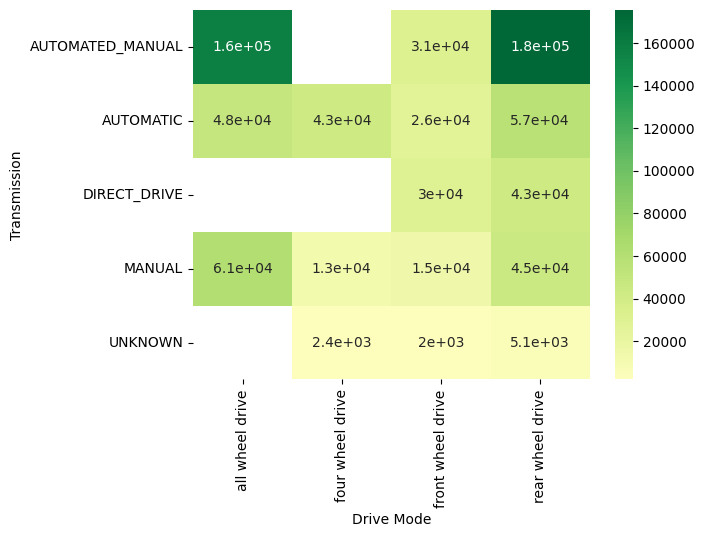

In [23]:
result = pd.pivot_table(data=df, index='Transmission', columns='Drive Mode', values='Price')
print(result)

sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

### Analysis Bivariate
Scatterplot

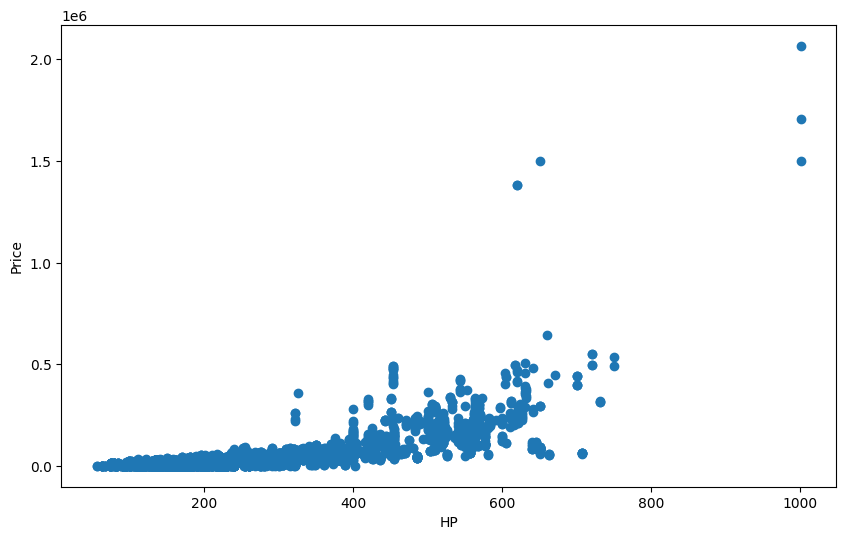

In [24]:
# mencari korelasi antara hp dan price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()
# semakin tinggi hp, maka semakin tinggi juga harga nya

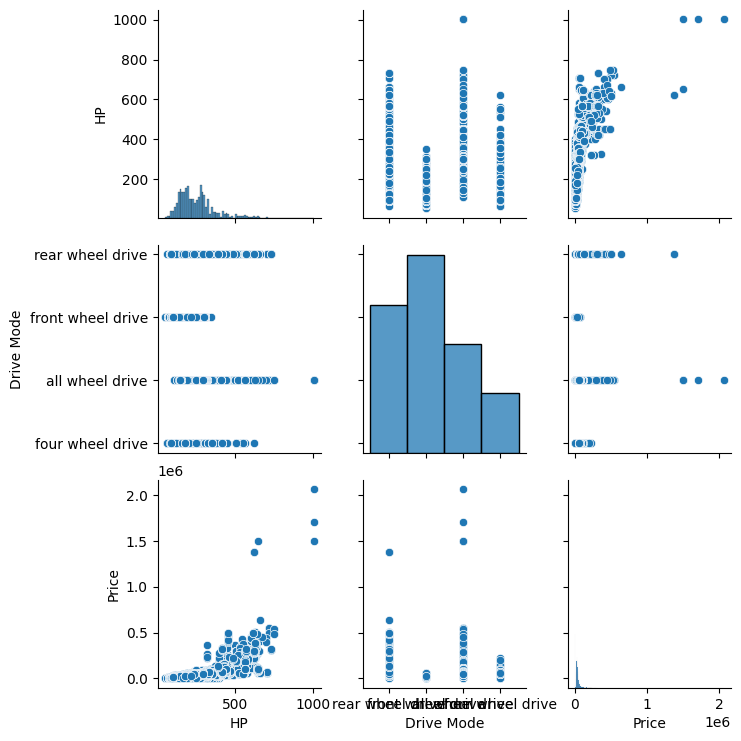

In [25]:
# 
sns.pairplot(data = df, vars=['HP', 'Drive Mode', 'Price'])
plt.show()

Correlation Matrix

In [26]:
df[['HP','Price']].corr()

,HP,Price
HP,1.000000,0.659835
Price,0.659835,1.000000
